# SmartBeds - Detección de ano

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [19]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
from sklearn import svm
from sklearn.model_selection import train_test_split
import pickle as pk
import matplotlib.pyplot as plt
from loadData import normalize
from utils import start_end

### Carga

In [27]:
with open('data/datos20Min.pdd','rb') as f:
    datos = pk.load(f)

In [28]:
# datos_s = datos con crisis
# datos_n = datos normales
datos_s = datos[datos['target']==True]
datos_n = datos[datos['target']==False]

In [29]:
# y_* = valor de cada instancia, n si es normal, s si es una crisis, f para todos
# X_* valores de P1 al último P, n si es normal, s si es una crisis, f para todos
datetimes = datos['DateTime'].values

x_cols=["P"+str(i) for i in range(1,len(datos.columns)-1)]

y_n = datos_n['target'].values
X_n = datos_n[x_cols].values

y_s = datos_s['target'].values
X_s = datos_s[x_cols].values

y_f = datos['target'].values
X_f = datos[x_cols].values

### Clasificamos

In [30]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_f)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

### Predicciones

In [31]:
y_pred = clf.predict(X_f)
y_pred = normalize(y_pred).astype(np.bool)
y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_f,y_pred)

array([[ 607, 5390],
       [ 294, 2708]])

In [34]:
coincide = y_pred == y_f
coincide

array([False, False, False, ..., False, False, False])

### Dibujado

In [35]:
no_crisis = datos[datos['target']==False]
crisis = datos[datos['target']==True]
start, start_5, end_5, end = start_end(datos)

aciertos = datos[coincide]

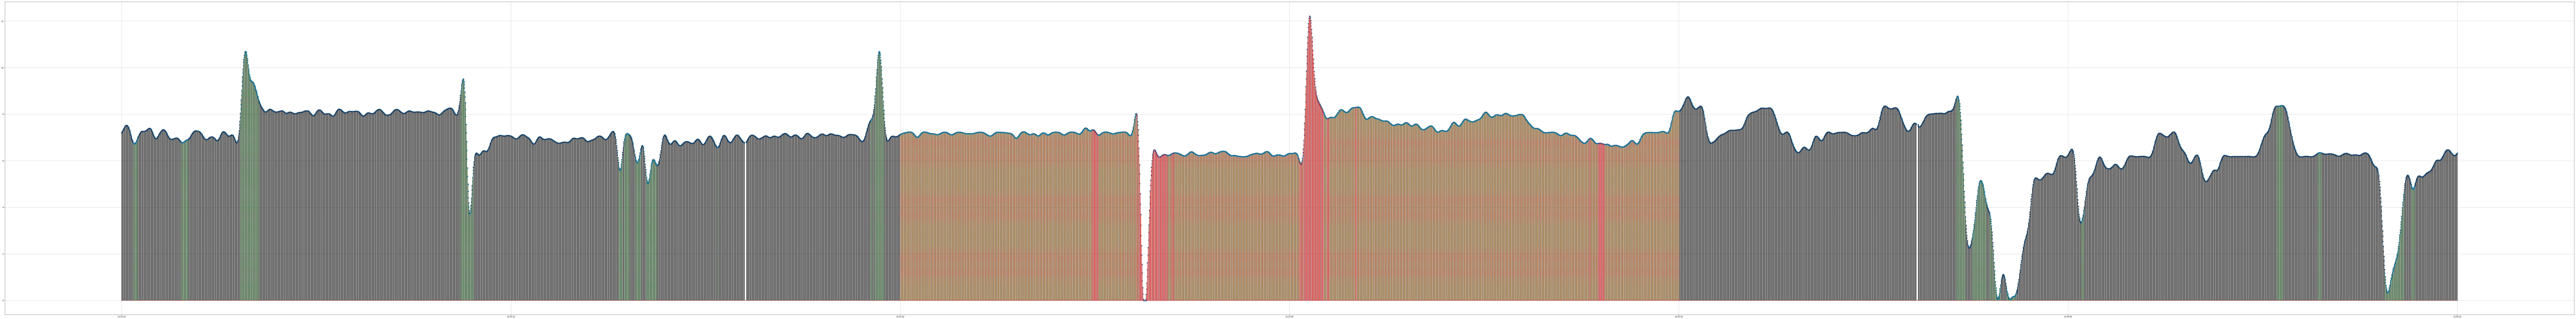

In [36]:
plt.figure(figsize=(256,32))
#Datos
plt.stem(no_crisis['DateTime'],no_crisis['P1'],'k-')
plt.stem(crisis['DateTime'],crisis['P1'],'r-')
#Aciertos - Se pinta de otro colos por encima si la predicción fue erronea
plt.stem(aciertos['DateTime'],aciertos['P1'],'g:')
plt.grid()